# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


_boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   

In [126]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [234]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import math

In [128]:
#Load boston housing dataset
from google.colab import files
file = files.upload()

In [235]:
boston_housing = pd.read_csv("BostonHousing.csv")
boston_housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [236]:
boston_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [237]:
X = boston_housing.drop(['medv'], axis=1)

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['medv'] 

In [238]:
data = X
data['medv'] = y

In [239]:
data.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Note:** You do not need to standardize data for this question. 


**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

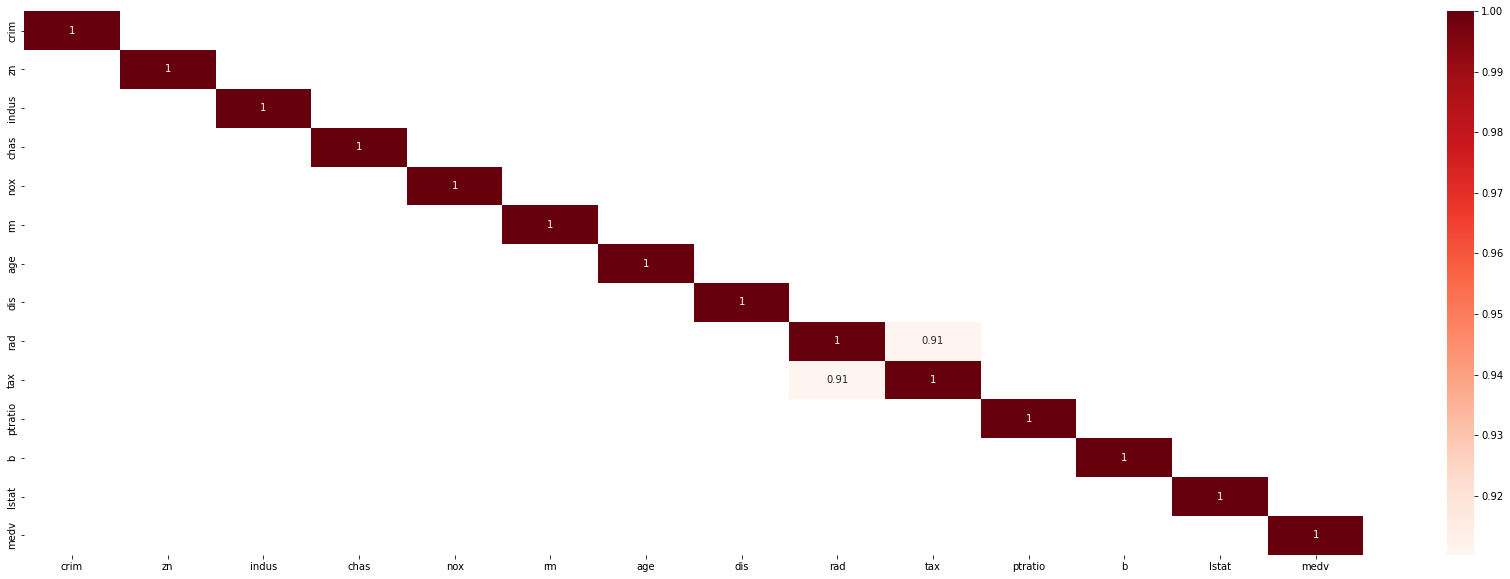

In [240]:
dfCorr = data.corr()
filteredDf = dfCorr[(dfCorr.abs()>=0.9)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [241]:
dfCorr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- I'm dropping RAD between RAD and TAX which have the correlation value >0.9


**TODO 2**

Partition the data into 75% training and 25% validation set.

In [242]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["rad", 'medv'], axis =1),data['medv'],test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 12), (127, 12), (379,), (127,))

In [243]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,193,17.8,394.12,4.82
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,403,14.7,88.01,15.02
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,216,14.9,387.31,3.76
126,0.38735,0.0,25.65,0,0.5810,5.613,95.6,1.7572,188,19.1,359.29,27.26
329,0.06724,0.0,3.24,0,0.4600,6.333,17.2,5.2146,430,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,666,20.2,109.85,23.27



**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [244]:
def LinearRegressionModel(X_train, y_train):
  X = X_train.values
  y = y_train.values
  X = np.insert(X,0,1,axis=1)

  A = np.matmul(X.T,X)
  B = np.linalg.inv(A)
  C = np.matmul(B, X.T)

  betas = np.matmul(C, y)
  return betas

feature_weights = LinearRegressionModel(X_train, y_train)
feature_weights

array([ 24.06578363,  -0.09208295,   0.02235944,  -0.00507719,
         3.11731701, -14.51943901,   4.63067916,  -0.01225383,
        -1.37991454,   0.0013042 ,  -0.82280449,   0.01240956,
        -0.50889419])

These are the reapective feature weights

In [245]:
feature_weights_df = pd.DataFrame(feature_weights[1:], index = X_train.columns, columns = ["Feature Weight"])
print("Intercept = ", feature_weights[0])
feature_weights_df

Intercept =  24.065783630833472


,Feature Weight
crim,-0.092083
zn,0.022359
indus,-0.005077
chas,3.117317
nox,-14.519439
rm,4.630679
age,-0.012254
dis,-1.379915
tax,0.001304
ptratio,-0.822804



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [246]:
def RMSE_MAE(model, X_test, y_test):
  RMSE = mean_squared_error(y_test, model.predict(X_test), squared= False)
  MAE = mean_absolute_error(y_test, model.predict(X_test))

  print(type(model).__name__,"\n")
  print("RMSE = ", RMSE, "\n", "MAE = ", MAE, "\n")

In [247]:
model1 = LinearRegression()
model1.fit(X_train[["age", "rm"]], y_train)
print("intercept_ = ", model1.intercept_,"\n", "coef_ = ", model1.coef_,"\n", "R2 score = ", model1.score(X_train[["age", "rm"]], y_train))

intercept_ =  -27.58753582438522 
 coef_ =  [-0.06759365  8.72450381] 
 R2 score =  0.5423032349278579



**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [248]:
RMSE_MAE(model1, X_test[["age", "rm"]], y_test)

LinearRegression 

RMSE =  6.091863482873926 
 MAE =  3.9239733036236437 




**TODO 6**

Now consider all the features (after removing linearly dependent variables (post completion of TODO1)). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [249]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
print("intercept_ = ", model2.intercept_,"\n", "coef_ = ", model2.coef_,"\n", "R2 score = ", model2.score(X_train, y_train))

intercept_ =  24.06578363084932 
 coef_ =  [ -0.09208295   0.02235944  -0.00507719   3.11731701 -14.51943901
   4.63067916  -0.01225383  -1.37991454   0.0013042   -0.82280449
   0.01240956  -0.50889419] 
 R2 score =  0.7406684337042502



**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [250]:
RMSE_MAE(model2, X_test, y_test)

LinearRegression 

RMSE =  4.88579625725069 
 MAE =  3.1871194988449405 




**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.

Text(0.5, 0, 'Error')

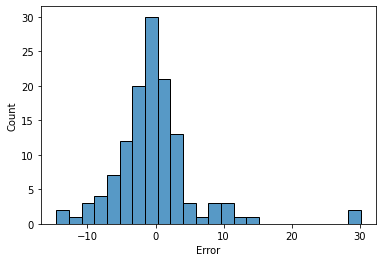

In [251]:
sns.histplot(data= y_test - model1.predict(X_test[["age", "rm"]]))
plt.xlabel("Error")

Text(0.5, 0, 'Error')

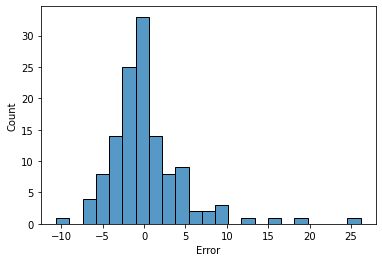

In [252]:
sns.histplot(data= y_test - model2.predict(X_test))
plt.xlabel("Error")

- The histograms are roughly symmetric and bell-shaped, this indicates that the errors follow a near normal distribution. This is a desirable property for a linear regression model, as it suggests that the errors are randomly distributed around the true values and the model is making accurate predictions.

- Moreover model 1 is able to explain some extreme values in the data that are not well explained by the model 2 linear regression model. This can be seen by the presence of outliers in Graph 2 than less outliers in Graph 1



**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [253]:
res = []
for lambda_par in np.arange(0.01, 1.0, 0.01):
  clf = Lasso(alpha=lambda_par)
  clf.fit(X_train, y_train)
  res.append([clf, lambda_par, mean_squared_error(y_test, clf.predict(X_test), squared= False)])

res_df = pd.DataFrame(res , columns = ["Model", "Lambda", "RMSE"])
res_df = res_df.sort_values(by = "RMSE")
res_df

,Model,Lambda,RMSE
0,Lasso(alpha=0.01),0.01,4.892510
1,Lasso(alpha=0.02),0.02,4.906963
2,Lasso(alpha=0.03),0.03,4.929081
3,Lasso(alpha=0.04),0.04,4.958758
4,Lasso(alpha=0.05),0.05,4.973785
...,...,...,...
94,Lasso(alpha=0.9500000000000001),0.95,5.098467
95,Lasso(alpha=0.9600000000000001),0.96,5.102261
96,Lasso(alpha=0.97),0.97,5.106118
97,Lasso(alpha=0.98),0.98,5.110038


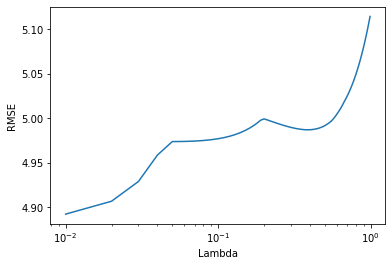

In [254]:
sns.lineplot(data = res_df, x= 'Lambda', y = 'RMSE')
plt.xscale('log')

From plot Minimum RMSE at lambda = 0.01


**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [255]:
model3 = res_df["Model"].iloc[0]
model3

Lasso(alpha=0.01)

In [256]:
RMSE_MAE(model3, X_test, y_test)

Lasso 

RMSE =  4.892509506280678 
 MAE =  3.1734543509833832 




**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

- From the given RMSE and MAE values, we can compare the performance of the three linear regression models among which Model 3 (Lasso) has the lowest RMSE and MAE values, indicating that it has the best overall performance among the three models. 

- In future i will go with the Lasso regression with Lambda = 0.01

### Problem 2

**About the data:** <br>
The advertising dataset includes advertising expenditure and sales of a product in 200 distinct markets.
The columns are as follows:

*   TV: Advertising expenditure of product in Television sector 
*   Newpaper: Advertising expenditure of product in Newspaper sector
*   Sales: Sales of the product


The goal is to predict the sales of the product based on the advertising expenditure in the two sectors.










#### Using Sklearn

Import Advertising.csv data <br>
(Sales column is the target variable)

In [257]:
df = pd.read_csv('advertising.csv')
df

,TV,newspaper,sales
0,230.1,69.2,22.1
1,44.5,45.1,10.4
2,17.2,69.3,9.3
3,151.5,58.5,18.5
4,180.8,58.4,12.9
...,...,...,...
195,38.2,13.8,7.6
196,94.2,8.1,9.7
197,177.0,6.4,12.8
198,283.6,66.2,25.5


**Todo 1:** Fit the data in a linear regression model using sklearn


In [258]:
x = df.drop(["sales"], axis = 1)
y = df["sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
reg = LinearRegression()
reg.fit(x_train,y_train)
print("intercept_ = ", reg.intercept_,"\n", "coef_ = ", reg.coef_,"\n", "R2 score = ", reg.score(x_train,y_train))

intercept_ =  5.642052219592914 
 coef_ =  [0.04596023 0.05476256] 
 R2 score =  0.6221623634195612


**Todo 2:** 
Predict the sales values from the above fitted model <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score

In [259]:
def metrics(y_test,y_pred):
  MAE = mean_absolute_error(y_test,y_pred)
  MSE = mean_squared_error(y_test,y_pred)
  RMSE = math.sqrt(MSE)
  R2_Score = r2_score(y_test,y_pred)
  return MAE,MSE,RMSE,R2_Score

In [260]:
y_pred = reg.predict(x_test)

MAE,MSE,RMSE,R2_Score = metrics(y_test,y_pred)

print("Predictions =", y_pred, "\n")
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

Predictions = [16.04429782 17.51962128 21.46954703  8.65505487 15.94233158 11.97965283
 17.09577232  8.94769502 16.58099746 15.41470967  7.21027718  9.85146545
 21.06359218  6.40500558 13.51018884 15.39212602  8.2447321  15.50142252
 10.88264106 17.15539956 20.25330783 15.00108837  8.04021557 21.13280792
  8.86259455  9.27284353 17.30553649 12.60289073 11.0681349   6.14311956
 15.98587299  9.82465523 18.0692963  11.31455345 20.5693043  16.88002112
  8.32741324 21.4906929  11.32430928  8.0395437  12.2384544  14.12749373
  9.54510426  9.50752962 16.79144024  8.15345649 11.12115726 13.45795941
 12.33332474 10.02501897 11.12545087 14.08271615 10.14909861  8.77152782
  9.96389992 13.30337455  9.72197035 21.76057481  7.47383637 15.04689323] 

MAE:  2.2522968610867236
MSE:  9.039585276699192
RMSE:  3.0065903074245406
R2_Score:  0.668935545006016


**Todo 3**: Plot the Actual and Predicted values. Provide interpretations for the visualization

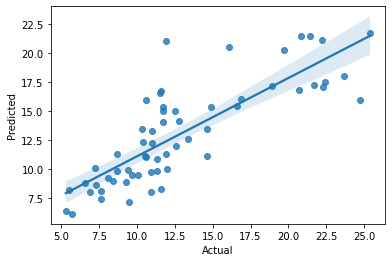

In [261]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- Actual and predicted are almost linearly related which says that model is having good predict ability

**Todo 4:** Plot a 3D visualization for the dataset given. The plane of the 3D plot should represent the line equation and the actual values are scattered across the plot

Equation: y = 5.6421 + 0.0460x1 + 0.0548x2


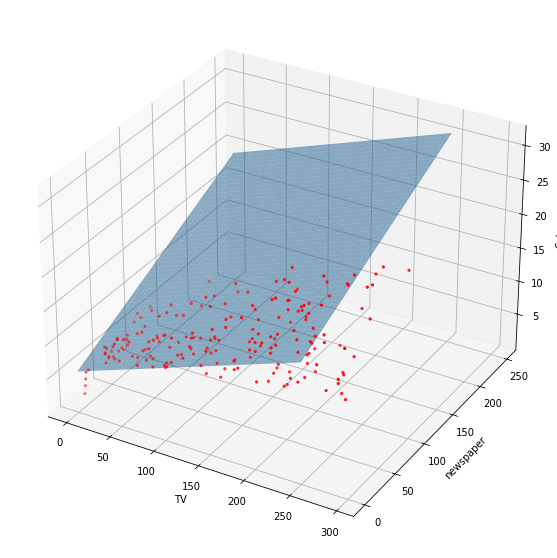

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x["TV"], x["newspaper"], y, marker='.', color='red')
ax.set_xlabel("TV")
ax.set_ylabel("newspaper")
ax.set_zlabel("Sales")

coefs = reg.coef_
intercept = reg.intercept_
xs = np.tile(np.arange(250), (250,1))
ys = np.tile(np.arange(250), (250,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.4f} + {:.4f}x1 + {:.4f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

#### Using Matrix Multiplication

##### Without Bias (excluding B0)

Import Advertsing.csv <br>
(Sales column is the target variable)

In [263]:
df = pd.read_csv('advertising.csv')
df

,TV,newspaper,sales
0,230.1,69.2,22.1
1,44.5,45.1,10.4
2,17.2,69.3,9.3
3,151.5,58.5,18.5
4,180.8,58.4,12.9
...,...,...,...
195,38.2,13.8,7.6
196,94.2,8.1,9.7
197,177.0,6.4,12.8
198,283.6,66.2,25.5


**Todo 1:** Use matrix multiplication to calculate the coefficients of the linear regression model


In [264]:
def LinearRegressionModel(X_train, y_train, mode="NotBias"):
  X = X_train.values
  y = y_train.values
  if mode == "Bias":
    X = np.insert(X,0,1,axis=1)

  A = np.matmul(X.T,X)
  B = np.linalg.inv(A)
  C = np.matmul(B, X.T)

  betas = np.matmul(C, y)
  return betas

feature_weights = LinearRegressionModel(x_train, y_train)
feature_weights

array([0.06489069, 0.11433286])

**Todo 2**: Predict the sales values from the above coefficients calculated. <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score with the predicted values to the actual values given in the csv.

In [265]:
y_hat = np.matmul(x_test,feature_weights)
MAE,MSE,RMSE,R2_Score = metrics(y_test,y_hat)

print("Predictions =", y_hat, "\n")
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

Predictions = 95     16.644858
15     18.727849
30     23.945663
158     5.927066
128    14.661284
115    10.898633
69     17.178156
170     5.348259
174    15.929450
45     14.963845
66      2.295589
182     7.042543
165    24.912294
78      1.425139
186    12.093506
177    15.068912
56      5.207082
152    14.445927
82      8.602087
68     16.662712
124    23.375912
16     17.433535
148     3.826407
93     24.547340
65      4.580357
60      5.918375
84     17.718613
67     10.205468
125     8.619689
132     0.785181
9      15.389017
18      6.582727
55     19.766730
75     11.318010
150    22.445133
104    16.062927
135     4.106050
137    24.586254
164     8.222586
76      4.151184
79     10.168409
197    12.217383
38      6.809872
24      6.134981
122    16.319107
195     4.056618
29      9.246064
19     11.742156
143    10.720617
86      6.780486
114     9.018936
173    12.391053
5       9.139514
126     6.291390
117     6.649775
73     11.975474
140     6.237871
98     24.652676


**Todo 3:** Plot the Actual and Predicted values. Provide interpretations for the visualization

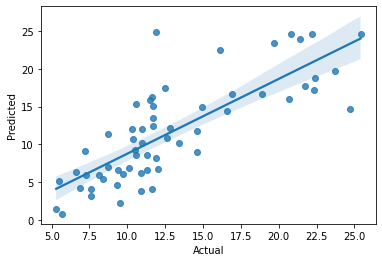

In [266]:
sns.regplot(x=y_test, y=y_hat)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- Actual and predicted are almost linearly related which says that model is having good predict ability

##### With Bias (including B0)

**Todo 1:** Use matrix multiplication to calculate the coefficients of the linear regression model with bias


In [267]:
feature_weights1 = LinearRegressionModel(x_train, y_train,"Bias")
feature_weights1

array([5.64205222, 0.04596023, 0.05476256])

**Todo 2**: 

Predict the sales values from the above coefficients calculated. <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score with the predicted values to the actual values given in the csv.

In [268]:
y_hat = feature_weights1[0] + np.matmul(x_test,feature_weights1[1:])
MAE,MSE,RMSE,R2_Score = metrics(y_test,y_hat)

print("Predictions =", y_hat, "\n")
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R2_Score: ",R2_Score)

Predictions = 95     16.044298
15     17.519621
30     21.469547
158     8.655055
128    15.942332
115    11.979653
69     17.095772
170     8.947695
174    16.580997
45     15.414710
66      7.210277
182     9.851465
165    21.063592
78      6.405006
186    13.510189
177    15.392126
56      8.244732
152    15.501423
82     10.882641
68     17.155400
124    20.253308
16     15.001088
148     8.040216
93     21.132808
65      8.862595
60      9.272844
84     17.305536
67     12.602891
125    11.068135
132     6.143120
9      15.985873
18      9.824655
55     18.069296
75     11.314553
150    20.569304
104    16.880021
135     8.327413
137    21.490693
164    11.324309
76      8.039544
79     12.238454
197    14.127494
38      9.545104
24      9.507530
122    16.791440
195     8.153456
29     11.121157
19     13.457959
143    12.333325
86     10.025019
114    11.125451
173    14.082716
5      10.149099
126     8.771528
117     9.963900
73     13.303375
140     9.721970
98     21.760575


**Todo 3**: Plot the Actual and Predicted values. Provide interpretations for the visualization

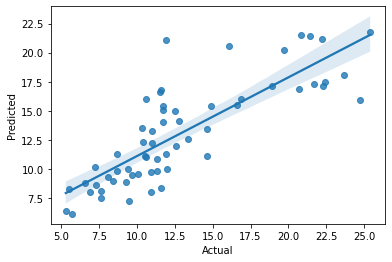

In [269]:
sns.regplot(x=y_test, y=y_hat)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- Actual and predicted are almost linearly related which says that model is having good predict ability

**Todo 4**: Compare and interpret results of with and without bias.

- Model with bias term 
MAE:  2.252296861086724
MSE:  9.039585276699194
RMSE:  3.0065903074245406

- Model without bias term
MAE:  3.405266450110862
MSE:  17.199235252387613
RMSE:  4.147196071128976

- From the given evaluation metrics, it seems that the model with a bias term performs better than the model without a bias term. The MAE, MSE, and RMSE values are all lower for the model with a bias term, indicating better performance.

- The bias term allows the linear regression model to better capture the underlying relationships between the predictor and response variables

**Todo 5**: Do you notice any difference between the model evaluated with bias and sklearn model.

### Model using sklearn module 
MAE:  2.2522968610867236
MSE:  9.039585276699192
RMSE:  3.0065903074245406

### Model from scratch
MAE:  2.252296861086724
MSE:  9.039585276699194
RMSE:  3.0065903074245406

No difference

#Problem 3 - Forward Selection

Using the abalone csv file, implement the forward selection.

For performance evaluation, use adjusted R squared.

**Dataset:**
abalone.csv

**Attribute Information:**
Given is the attribute name, attribute type, the measurement unit, and a brief description. 

Name / Data Type / Measurement Unit / Description 

Length / continuous / mm / Longest shell measurement 

Diameter / continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous / grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years

**The target variable is Rings. The rest are predictors.**

**TODO 1:**
Load the csv file and split the data into train and test with 70:30 ratio.


In [270]:
abalone_df = pd.read_csv("abalone.csv")
X = abalone_df.drop('Rings',axis=1)
y = abalone_df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
abalone_df

(2923, 7) (1254, 7) (2923,) (1254,)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [271]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2830,0.525,0.430,0.135,0.8435,0.4325,0.1800,0.1815
925,0.430,0.325,0.100,0.3645,0.1575,0.0825,0.1050
3845,0.455,0.350,0.105,0.4160,0.1625,0.0970,0.1450
547,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155
2259,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950
...,...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450
466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.2350


**TODO 2:**
Choosing the first variable.

Write a function with inputs as variables, builds a linear regression model (use sklearn) and returns the adjusted R squared score. 

1. From the 7 variables present, select one variable each time and build a linear regression model (using the above function that you have built). 

2. Compare the model performance by adjusted R square. Present your results in a tabular form with vairable and the R squared value.

3. Select the winning model.

In [272]:
def forward_selection(X_train, y_train, predictors):
  model = LinearRegression().fit(X_train[predictors], y_train)
  R2 = model.score(X_train[predictors], y_train)

  n = X_train.shape[0]
  d = len(predictors)
  R2_adj = 1- (((n-1)*(1-R2))/(n-d-1))
  return R2_adj

In [273]:
res = []
for col in X_train.columns:
  res.append([col, forward_selection(X_train, y_train, predictors = [col])])
res_df = pd.DataFrame(res , columns = ["Variable taken", "Adjusted R2"])
res_df = res_df.sort_values(by = "Adjusted R2", ascending=False)
res_df

,Variable taken,Adjusted R2
6,Shell weight,0.390440
1,Diameter,0.320272
0,Length,0.302146
2,Height,0.295420
3,Whole weight,0.285783
5,Viscera weight,0.248910
4,Shucked weight,0.171038


In [274]:
var_1 = res_df["Variable taken"].iloc[0]
var_1

'Shell weight'

In [275]:
# winning model
model = LinearRegression()
model.fit(X_train[[var_1]], y_train)
print("intercept_ = ", model.intercept_,"\n", "coef_ = ", model.coef_,"\n", "R2 score = ", model.score(X_train[[var_1]], y_train))

intercept_ =  6.508970204283252 
 coef_ =  [14.40180027] 
 R2 score =  0.390648507471149


**TODO 3:**
Choosing the second variable
1. Using the variable from the winning model, find the second best variable with the possible combinations.

2. compare the model performance and present your results in a tabular form.

3. select the winning model.

In [276]:
res = []
for col in X_train.columns:
  if col != var_1:
    res.append([[var_1, col], forward_selection(X_train, y_train, predictors = [var_1, col])])
res_df = pd.DataFrame(res , columns = ["Variable taken", "Adjusted R2"])
res_df = res_df.sort_values(by = "Adjusted R2", ascending=False)
res_df

,Variable taken,Adjusted R2
4,"[Shell weight, Shucked weight]",0.476705
3,"[Shell weight, Whole weight]",0.436023
5,"[Shell weight, Viscera weight]",0.415310
2,"[Shell weight, Height]",0.395902
0,"[Shell weight, Length]",0.390802
1,"[Shell weight, Diameter]",0.390246


**Todo 4:** What are the 2 variables selected

In [277]:
var_2 = res_df["Variable taken"].iloc[0]
var_2

['Shell weight', 'Shucked weight']

The above printed are the 2 selected variables

In [278]:
# winning model
model = LinearRegression()
model.fit(X_train[var_2], y_train)
print("intercept_ = ", model.intercept_,"\n", "coef_ = ", model.coef_,"\n", "R2 score = ", model.score(X_train[var_2], y_train))

intercept_ =  6.728292320584227 
 coef_ =  [27.14436069 -9.0746171 ] 
 R2 score =  0.4770635822721623
